In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [ ]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
# Ajustar o modelo de regressão linear
reg = smf.ols('tip ~ net_bill', data=tips).fit()
# Exibir o sumário do modelo
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           5.02e-23
Time:                        09:47:33   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

**1. Cabeçalho:**

Dep. Variable: A variável dependente, que estamos tentando prever. Neste caso, é a "tip" (gorjeta).


R-squared: O coeficiente de determinação, que indica o quanto da variabilidade da variável dependente é explicada pelo modelo. Neste caso, é 0.333 ou 33.3%, o que significa que aproximadamente 33.3% da variabilidade em "tip" é explicada por "net_bill".


Adj. R-squared: É o R-quadrado ajustado, que leva em consideração o número de preditores no modelo. É útil para comparar modelos com diferentes números de preditores.


Method: O método utilizado para ajustar o modelo, que é         
(Mínimos Quadrados).


No. Observations: O número de observações usadas no modelo, que é 244 neste caso.


---


**2. Tabela de Coeficientes:**


   coef: Os coeficientes estimados para o modelo. O coeficiente para "net_bill" é 0.0993, o que significa que para cada aumento de uma unidade em "net_bill", a "tip" aumenta em 0.0993 unidades.


   std err: O erro padrão dos coeficientes, que é uma medida da variação dos coeficientes.


   t: O valor-t, que é usado para testar a hipótese nula de que o coeficiente é igual a zero (sem efeito).


  P>|t|: O valor-p associado ao valor-t. Um valor-p pequeno (< 0.05) indica que você pode rejeitar a hipótese nula.


  [0.025 0.975]: O intervalo de confiança de 95% para o coeficiente.

  ---

**3. Testes de Diagnóstico:**


Omnibus/Prob(Omnibus): Um teste para a normalidade dos resíduos.


Skew: Uma medida do grau de assimetria dos dados em torno da média.


Kurtosis: Uma medida do "achatamento" da distribuição dos dados.


Durbin-Watson: Um teste para detectar a presença de autocorrelação nos resíduos.

---

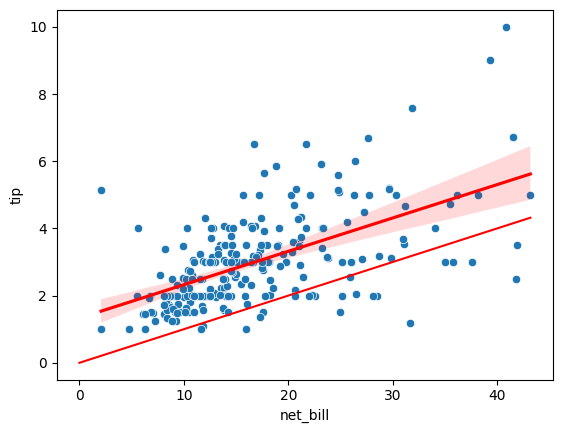

In [ ]:
# Criar o gráfico de dispersão
sns.scatterplot(x='net_bill', y='tip', data=tips)

# Adicionar linha de regressão
sns.regplot(x='net_bill', y='tip', data=tips, scatter=False, color='red')

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Mostrar o gráfico
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [ ]:
# Ajustar o novo modelo de regressão linear
reg_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibir o sumário do novo modelo
print(reg_pct.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.52e-06
Time:                        09:50:38   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

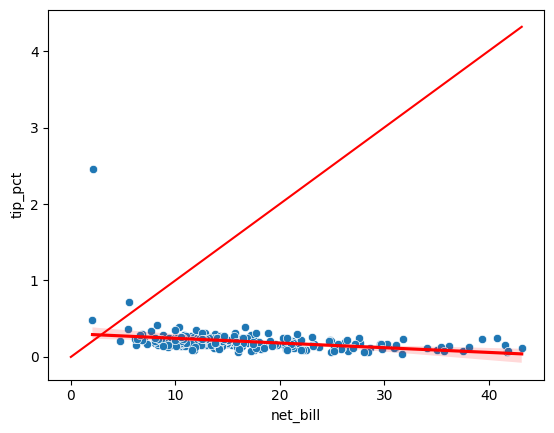

In [ ]:
# Criar o gráfico de dispersão para tip_pct e net_bill
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)

# Adicionar linha de regressão
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter=False, color='red')

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Mostrar o gráfico
plt.show()


Os resultados da regressão OLS para tip_pct mostram um R-quadrado de 0.091, o que indica que apenas cerca de 9,1% da variabilidade em tip_pct é explicada por net_bill. Isso é significativamente menor do que o R-quadrado para tip explicado por net_bill, que era de aproximadamente 33.3%.

---

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [ ]:
1. R-quadrado: O modelo para tip tem um R-quadrado maior, indicando um melhor ajuste em comparação com o modelo para tip_pct.

2. Coeficientes: O coeficiente para net_bill no modelo de tip_pct é negativo, sugerindo que à medida que net_bill aumenta, tip_pct tende a diminuir. Isso é interessante e talvez contraintuitivo.

3. Significância: Ambos os modelos são estatisticamente significativos (P < 0.05), mas o modelo para tip parece ser mais explicativo.

4. Outliers e Distribuição: O teste Omnibus e o teste Jarque-Bera indicam que os resíduos não são normalmente distribuídos, o que pode ser uma preocupação para a inferência estatística.


 ---
 **Podemos comparar diretamente os R²s?**

Não é apropriado comparar diretamente os R-quadrados desses dois modelos porque eles estão modelando coisas diferentes (tip vs tip_pct). Além disso, o R-quadrado é sensível à escala da variável dependente, tornando a comparação direta enganosa. Seria mais útil comparar cada modelo com um modelo nulo para a mesma variável dependente ou usar outras métricas, como o AIC ou BIC, para avaliação do modelo.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [ ]:
# Ajustando o modelo para 'tip' explicado por 'net_bill' (Item 1)
reg1 = smf.ols('tip ~ net_bill', data=tips).fit()

# Calculando o R-quadrado para o Item 1 usando o atributo rsquared do modelo ajustado
r2_item1 = reg1.rsquared
print(f'R-quadrado para o Item 1: {r2_item1}')

# Ajustando o modelo para 'tip_pct' explicado por 'net_bill' (Item 3)
reg3 = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Obtendo os valores preditos para 'tip_pct'
pred_tip_pct = reg3.fittedvalues

# Calculando os valores preditos para 'tip'
pred_tip = pred_tip_pct * tips['net_bill']

# Ajustando um novo modelo para 'tip' usando os valores preditos
reg4 = smf.ols('tip ~ pred_tip', data=tips).fit()

# Calculando o R-quadrado para este modelo usando o atributo rsquared do modelo ajustado
r2_for_tip = reg4.rsquared

print(f'R-quadrado para o Item 4: {r2_for_tip}')

# Comparando os valores de R-quadrado
print(f'Comparação dos valores de R-quadrado:\nItem 1: {r2_item1}\nItem 4: {r2_for_tip}')

R-quadrado para o Item 1: 0.3325407312323707
R-quadrado para o Item 4: 0.12112385704528694
Comparação dos valores de R-quadrado:
Item 1: 0.3325407312323707
Item 4: 0.12112385704528694


**Interpretação dos R-quadrados**


* Item 1: O R-quadrado é 0.333, o que significa que aproximadamente 33,3% da variabilidade em tip é explicada por net_bill.

* Item 4: O R-quadrado é 0.121, o que significa que apenas cerca de 12,1% da variabilidade em tip é explicada pelo modelo que usa tip_pct como intermediário.

**O que isso nos diz?**


* Eficiência do Modelo: O modelo do Item 1 é mais eficiente em explicar a variabilidade em tip em comparação com o modelo do Item 4. Isso é evidenciado pelos valores de R-quadrado mais altos no Item 1.

* Complexidade e Interpretação: O modelo do Item 4 é um pouco mais complexo, pois envolve uma etapa adicional (calcular tip_pct primeiro e depois usar isso para calcular tip). No entanto, isso não se traduz em um melhor ajuste, como visto pelo R-quadrado mais baixo.

* Comparação Direta: Não é apropriado comparar esses R-quadrados diretamente, pois eles são para diferentes variáveis dependentes (tip vs. tip calculado de tip_pct). Além disso, o R-quadrado é sensível à escala da variável dependente.